# Early Detection of Blood Disorders Predictive Modeling from Lab and Outpatient Data

## Library Import

In [63]:
import os
import sys

import pandas as pd
import numpy as np
import missingno as msno

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import ShuffleSplit
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import TSNE
from umap import UMAP

import seaborn as sns
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    classification_report,
    make_scorer,
)

import optuna

### Loading data

In [64]:
parent_dir = os.getcwd()
dir = parent_dir
os.chdir(dir)

In [65]:
df = pd.read_excel("/Users/valeria/Desktop/Hackaton/data4.xlsx")

## About 

We have:

- 40000 patients treated in NMRC for hematology (Moscow, Russia) 2014 - 2024 yy.


### 📊 Data sources
- **Complete blood count (52 parameters)**:
  - Cellular composition (red blood cells, white blood cells, platelets)
  - Indices (MCV, MCH, RDW)
  - Leukocyte formula (neutrophils, lymphocytes, etc.)

- **Biochemical analysis (17 parameters)**:
  - Protein metabolism (total protein, albumin)
  - Enzymes (ALT, AST, LDH)
  - Iron parameters (ferritin, transferrin)
  - Renal markers (creatinine, urea)




# EDA (Exploratory Data Analysis) 

- The first data analysis 
 

## 1. Initial data inspection

- **Data loading**: Format (CSV, JSON, SQL, etc.), encoding, separators.
- **General information**:
  - Data size (rows, columns).
  - Data types
  - Statistics on numerical attributes

In [66]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31193 entries, 0 to 31192
Data columns (total 91 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   client_id                                               31193 non-null  int64  
 1   age                                                     30992 non-null  float64
 2   диагноз клинический                                     31193 non-null  object 
 3   grouped_diagnosis                                       31193 non-null  object 
 4   Атипичные мононуклеары[ЛФ_АтипМоно]                     18150 non-null  float64
 5   Базофилы[00029]                                         26128 non-null  float64
 6   Базофилы[00030]                                         15962 non-null  float64
 7   Гематокрит[00003]                                       30222 non-null  float64
 8   Гемоглобин[00001]                   

In [67]:
df.describe()

client_id           age  Атипичные мононуклеары[ЛФ_АтипМоно]  \
count   31193.000000  30992.000000                         18150.000000   
mean   290070.005386     48.359383                             0.005510   
std    104701.427994     16.578090                             0.334068   
min        93.000000      6.000000                             0.000000   
25%    240214.000000     35.000000                             0.000000   
50%    293340.000000     49.000000                             0.000000   
75%    374126.000000     62.000000                             0.000000   
max    453859.000000     99.000000                            37.000000   

       Базофилы[00029]  Базофилы[00030]  Гематокрит[00003]  Гемоглобин[00001]  \
count     26128.000000     15962.000000       30222.000000       30219.000000   
mean          0.088054         0.644380           0.386681         125.047983   
std           0.753086         0.721487           0.659391          25.724481   
min           0.000000         0.000000           0.026000          22.000000   
25%           0.010000         0.300000           0.336000         110.000000   
50%           0.030000         0.500000           0.383000         129.000000   
75%           0.060000         0.700000           0.420000         143.000000   
max          58.330000        16.700000          41.600000         229.000000   

       Количество незрелых гранулоцитов[00036]  \
count                                 3.000000   
mean                                  0.833333   
std                                   0.750555   
min                                   0.400000   
25%                                   0.400000   
50%                                   0.400000   
75%                                   1.050000   
max                                   1.700000   

       Контрольная сумма[ЛФ_Контрольный]  Лейкоциты[00010]  ...  \
count                       18291.000000      30227.000000  ...   
mean                           99.877535         10.157598  ...   
std                             7.400744         25.631983  ...   
min                             0.000000          0.150000  ...   
25%                           100.000000          4.700000  ...   
50%                           100.000000          6.330000  ...   
75%                           100.000000          8.560000  ...   
max                          1000.000000       1226.080000  ...   

       Холестерин[1.11.1.7]  Щелочная фосфатаза[1.11.1.19]        gender  \
count          10854.000000                   15211.000000  31193.000000   
mean               5.064759                      91.814739      0.415927   
std                1.563177                      80.779865      0.492889   
min                1.150000                      11.000000      0.000000   
25%                4.020000                      61.000000      0.000000   
50%                4.970000                      77.400000      0.000000   
75%                5.960000                     100.000000      1.000000   
max               25.650000                    3097.000000      1.000000   

       Анизоцитоз[ЛФ_Анизоцитоз]_+  Анизоцитоз[ЛФ_Анизоцитоз]_++  \
count                 31193.000000                  31193.000000   
mean                      0.159363                      0.037861   
std                       0.366020                      0.190863   
min                       0.000000                      0.000000   
25%                       0.000000                      0.000000   
50%                       0.000000                      0.000000   
75%                       0.000000                      0.000000   
max                       1.000000                      1.000000   

       Анизоцитоз[ЛФ_Анизоцитоз]_+++  Анизоцитоз[ЛФ_Анизоцитоз]_-  \
count                   31193.000000                 31193.000000   
mean                        0.003687                     0.000321   
std                         0.060607         

In [68]:
print(f"Number of samples: {df.shape[0]}")
print(f"Number of descriptors: {df.shape[1]}")
print(f"Total number of NA: {df.isna().sum().sum()}")
print(f"Number of duplicate values: {df.duplicated().sum()}")

Number of samples: 31193
Number of descriptors: 91
Total number of NA: 1070084
Number of duplicate values: 0


## Split

### **EDA should primarily use the training set**

#### Reasons:

**Preventing Data Leakage**:
   - Test data should remain completely unseen during EDA
   - Any insights from test data may unconsciously influence preprocessing

**Validation Purposes**:
   - Test data serves as final model evaluation


In [69]:
target_column = "grouped_diagnosis"

# Encode string labels to numerical values
le = LabelEncoder()
y = le.fit_transform(df[target_column])
X = df.drop(columns=[target_column])

# Split into train/test (stratified by target)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

- **correspondence between classes and diseases**

In [70]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("According to the label mapping:")
for disease, code in label_mapping.items():
    print(f"{disease}: {code}")

According to the label mapping:
C81: 0
C82: 1
C83: 2
C85: 3
C90: 4
C91: 5
C92: 6
D45: 7
D46: 8
D47: 9
D50: 10
D59: 11
D61: 12
D69: 13
D70: 14
D72: 15
D75: 16
other: 17


#### Short dataset for analysis

In [71]:
X_short, _, y_short, _ = train_test_split(
    X_train, y_train, test_size=0.7, random_state=42
)

## Problems with data

- **a lot of missing values**
    - analysis with msno


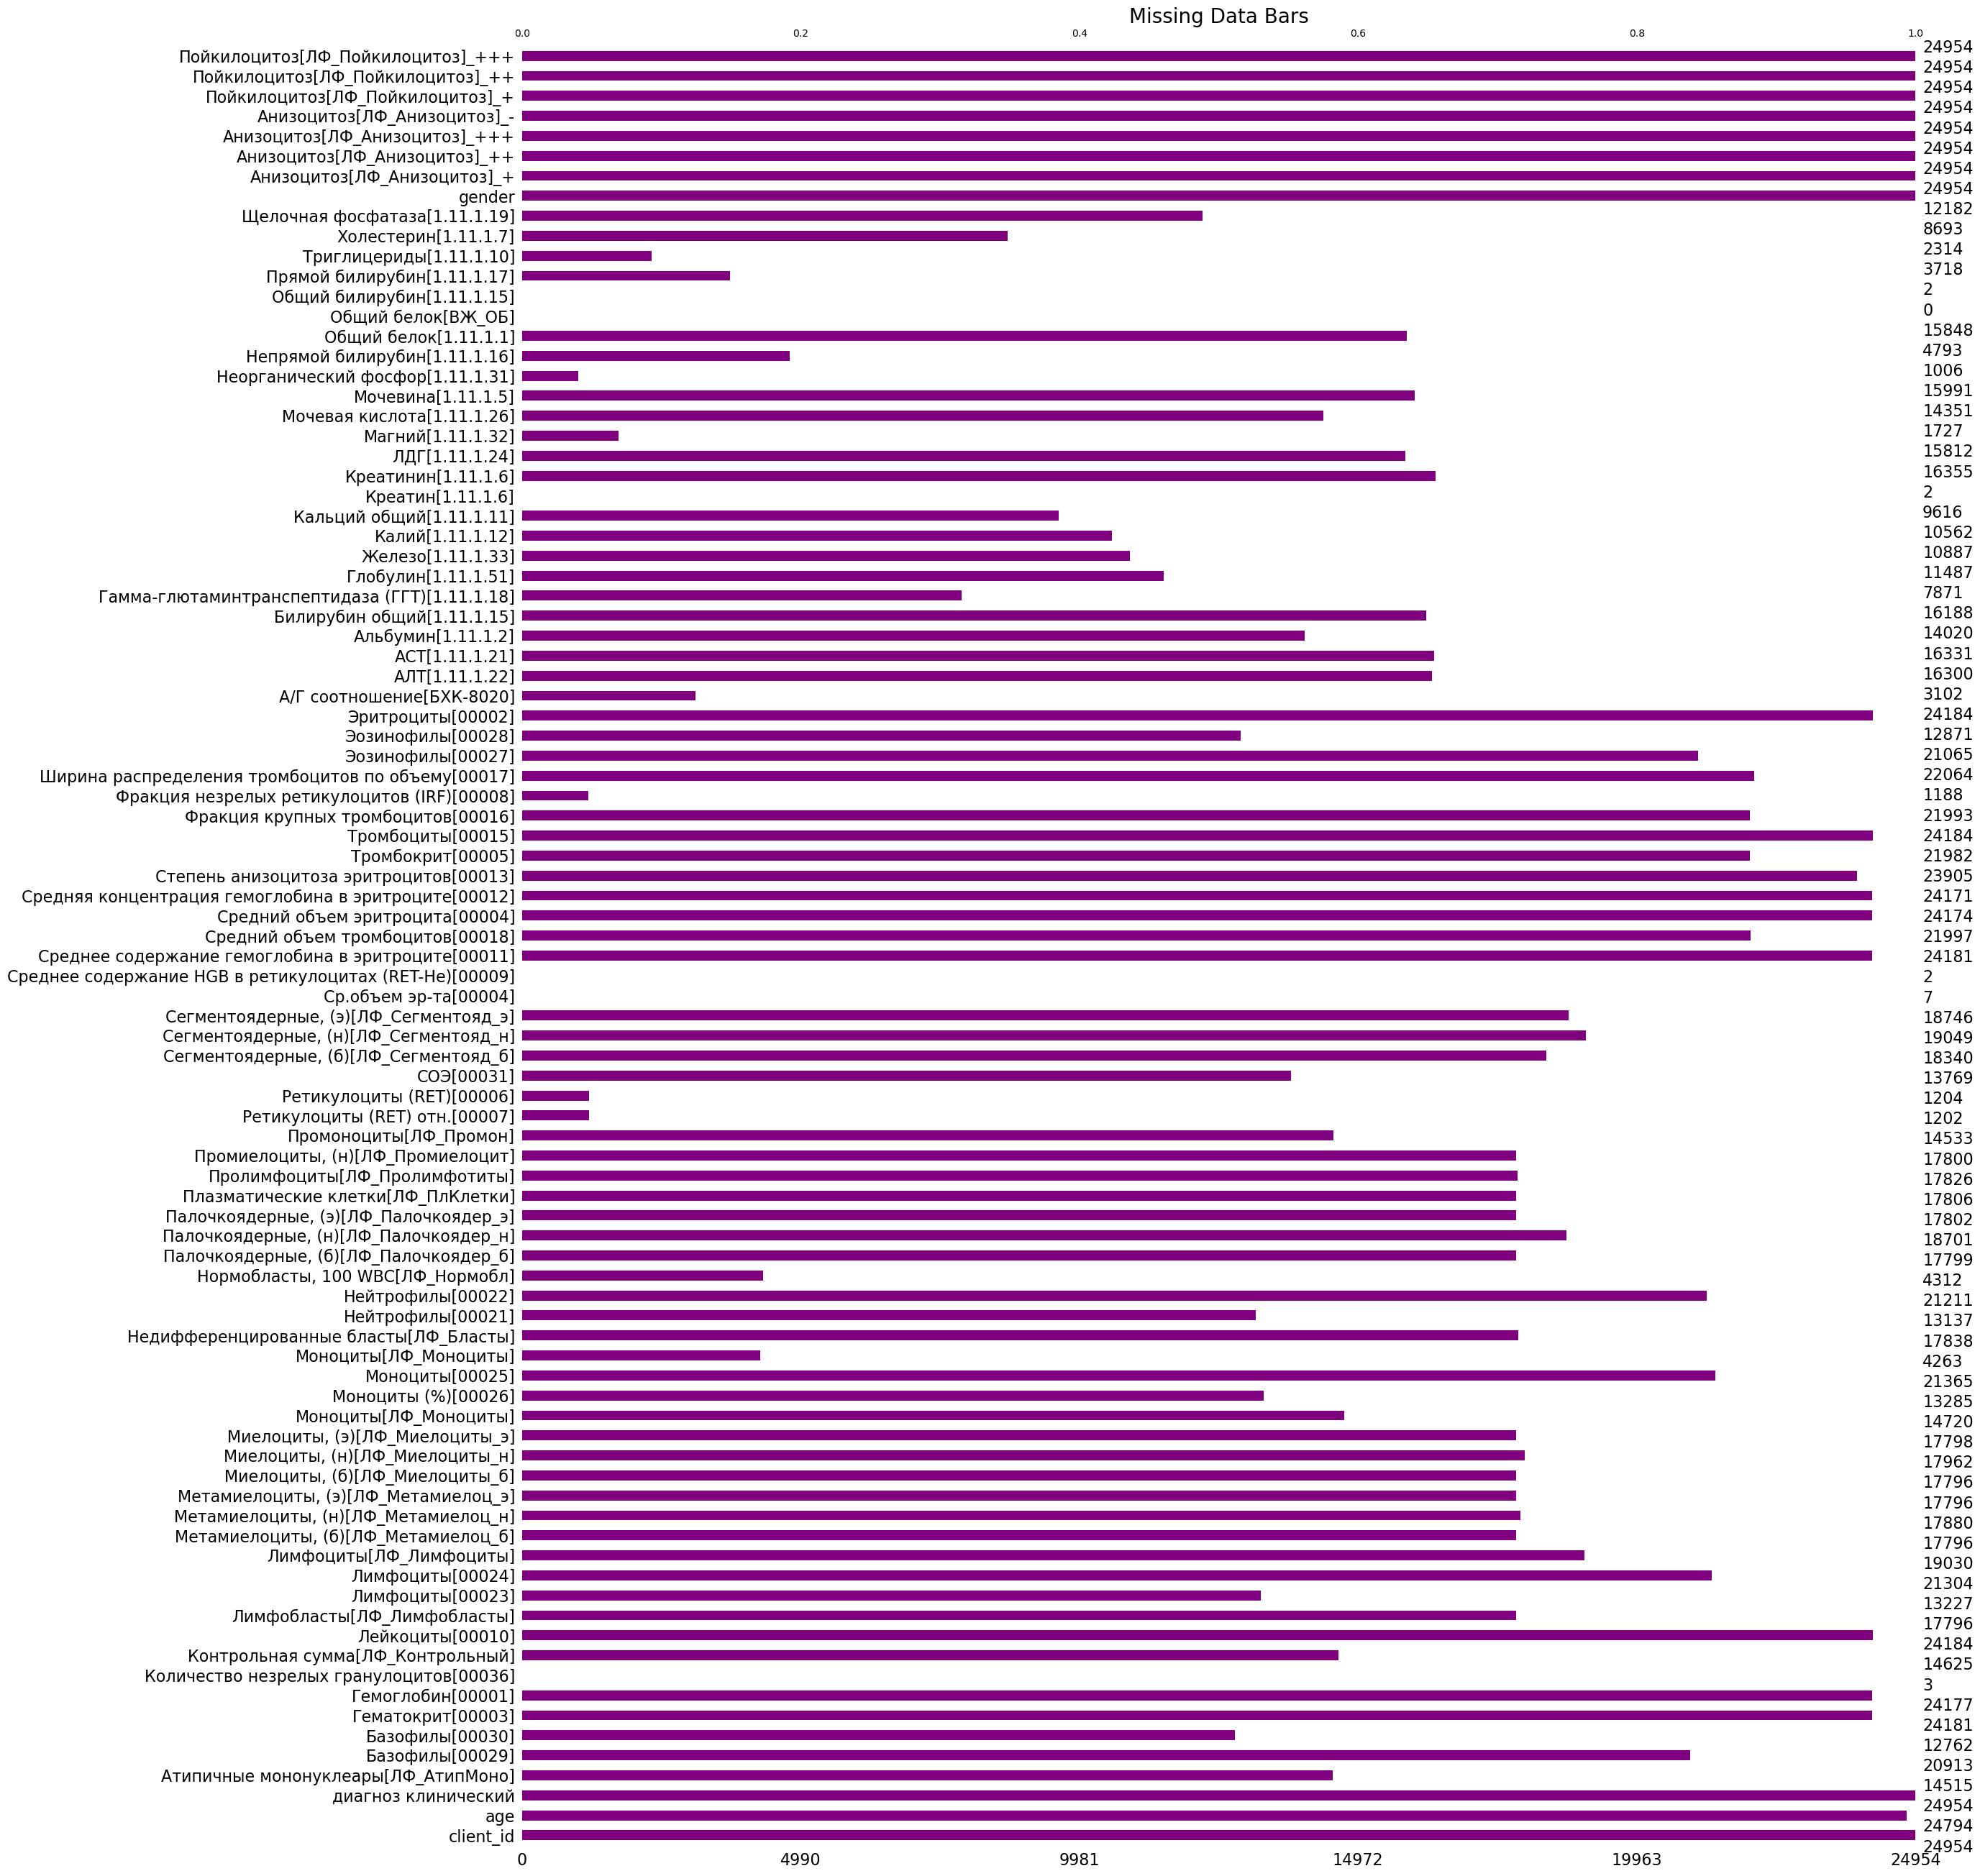

<Figure size 300x200 with 0 Axes>

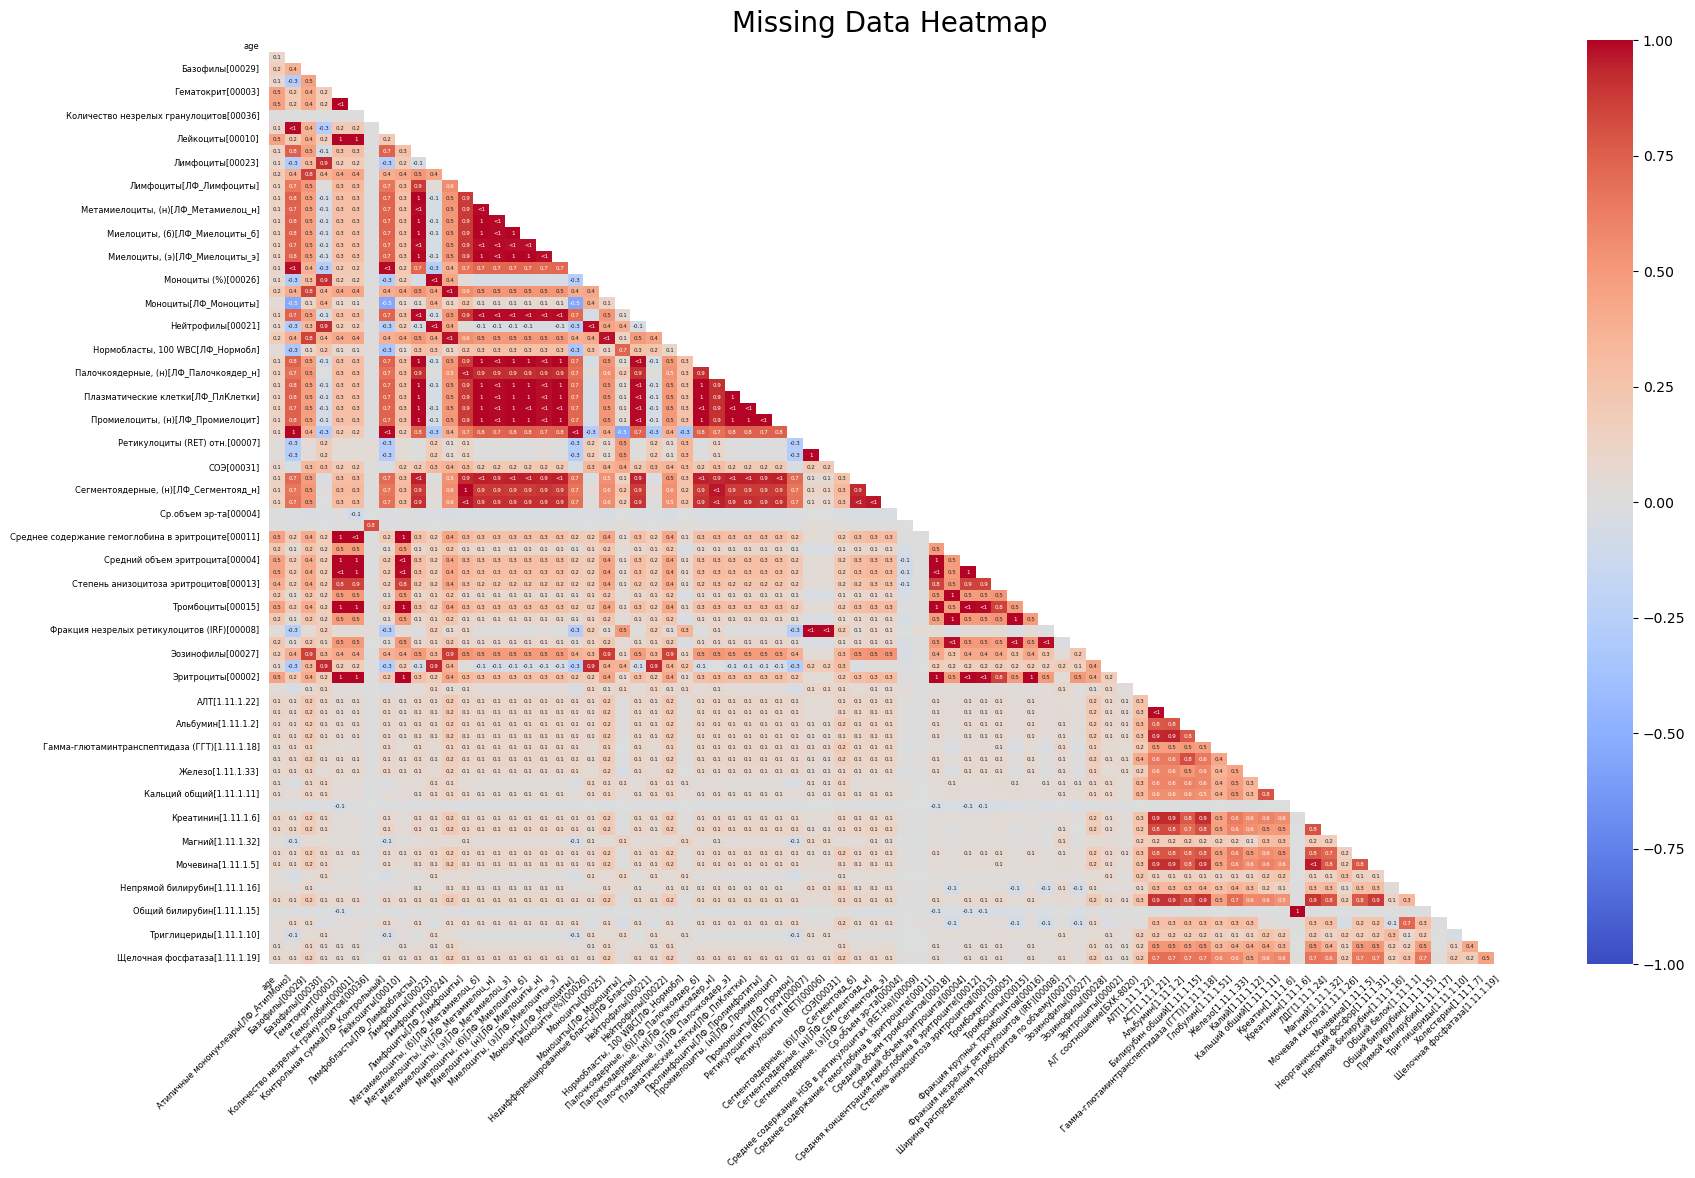

In [72]:
msno.bar(X_train, color="Purple")
plt.title("Missing Data Bars", fontsize=20)
plt.show()


plt.figure(figsize=(3, 2))
msno.heatmap(X_train, cmap="coolwarm", vmin=-1, vmax=1, fontsize=6)
plt.title("Missing Data Heatmap", fontsize=20)
plt.show()

#### A lot of missing values - filtering features with more than 30%

#### **Filtering Features with >30% Missing Values:**
- **Implementation Rationale**:
  - Columns with majority missing data typically provide little predictive value
  - Threshold of 30% balances information retention and data quality
  - Document exact count of dropped features for reproducibility

#### On the recommendation of a hematologist, important features that could have a significant impact on the classification of diseases were retained.


- **Download clean final data**

In [73]:
df_final = pd.read_excel("/Users/valeria/Desktop/Hackaton/data_finish.xlsx")

In [74]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31193 entries, 0 to 31192
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            31193 non-null  int64  
 1   client_id                                             31193 non-null  int64  
 2   age                                                   30992 non-null  float64
 3   диагноз клинический                                   31193 non-null  object 
 4   grouped_diagnosis                                     31193 non-null  object 
 5   Базофилы[00029]                                       26128 non-null  float64
 6   Базофилы[00030]                                       15962 non-null  float64
 7   Гематокрит[00003]                                     30222 non-null  float64
 8   Гемоглобин[00001]                                     30

In [75]:
print(f"Number of samples: {df_final.shape[0]}")
print(f"Number of descriptors: {df_final.shape[1]}")
print(f"Total number of NA: {df_final.isna().sum().sum()}")
print(f"Number of duplicate values: {df_final.duplicated().sum()}")

Number of samples: 31193
Number of descriptors: 65
Total number of NA: 506103
Number of duplicate values: 0


In [76]:
df_final.loc[df_final["диагноз клинический"] == "healthy", "grouped_diagnosis"] = (
    "healthy"
)

In [77]:
df_final = df_final.drop(columns=["client_id", "Unnamed: 0"])

- **Split (the same)**

In [78]:
target_column = "grouped_diagnosis"

# Encode string labels to numerical values
le = LabelEncoder()
y = le.fit_transform(df_final[target_column])
X = df_final.drop(columns=[target_column])

# Split into train/test (stratified by target)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [79]:
X_short, _, y_short, _ = train_test_split(
    X_train, y_train, test_size=0.7, random_state=42
)

## 2. Handling missing values
- **Missing value analysis**:

  - Number/proportion of missing values by column.

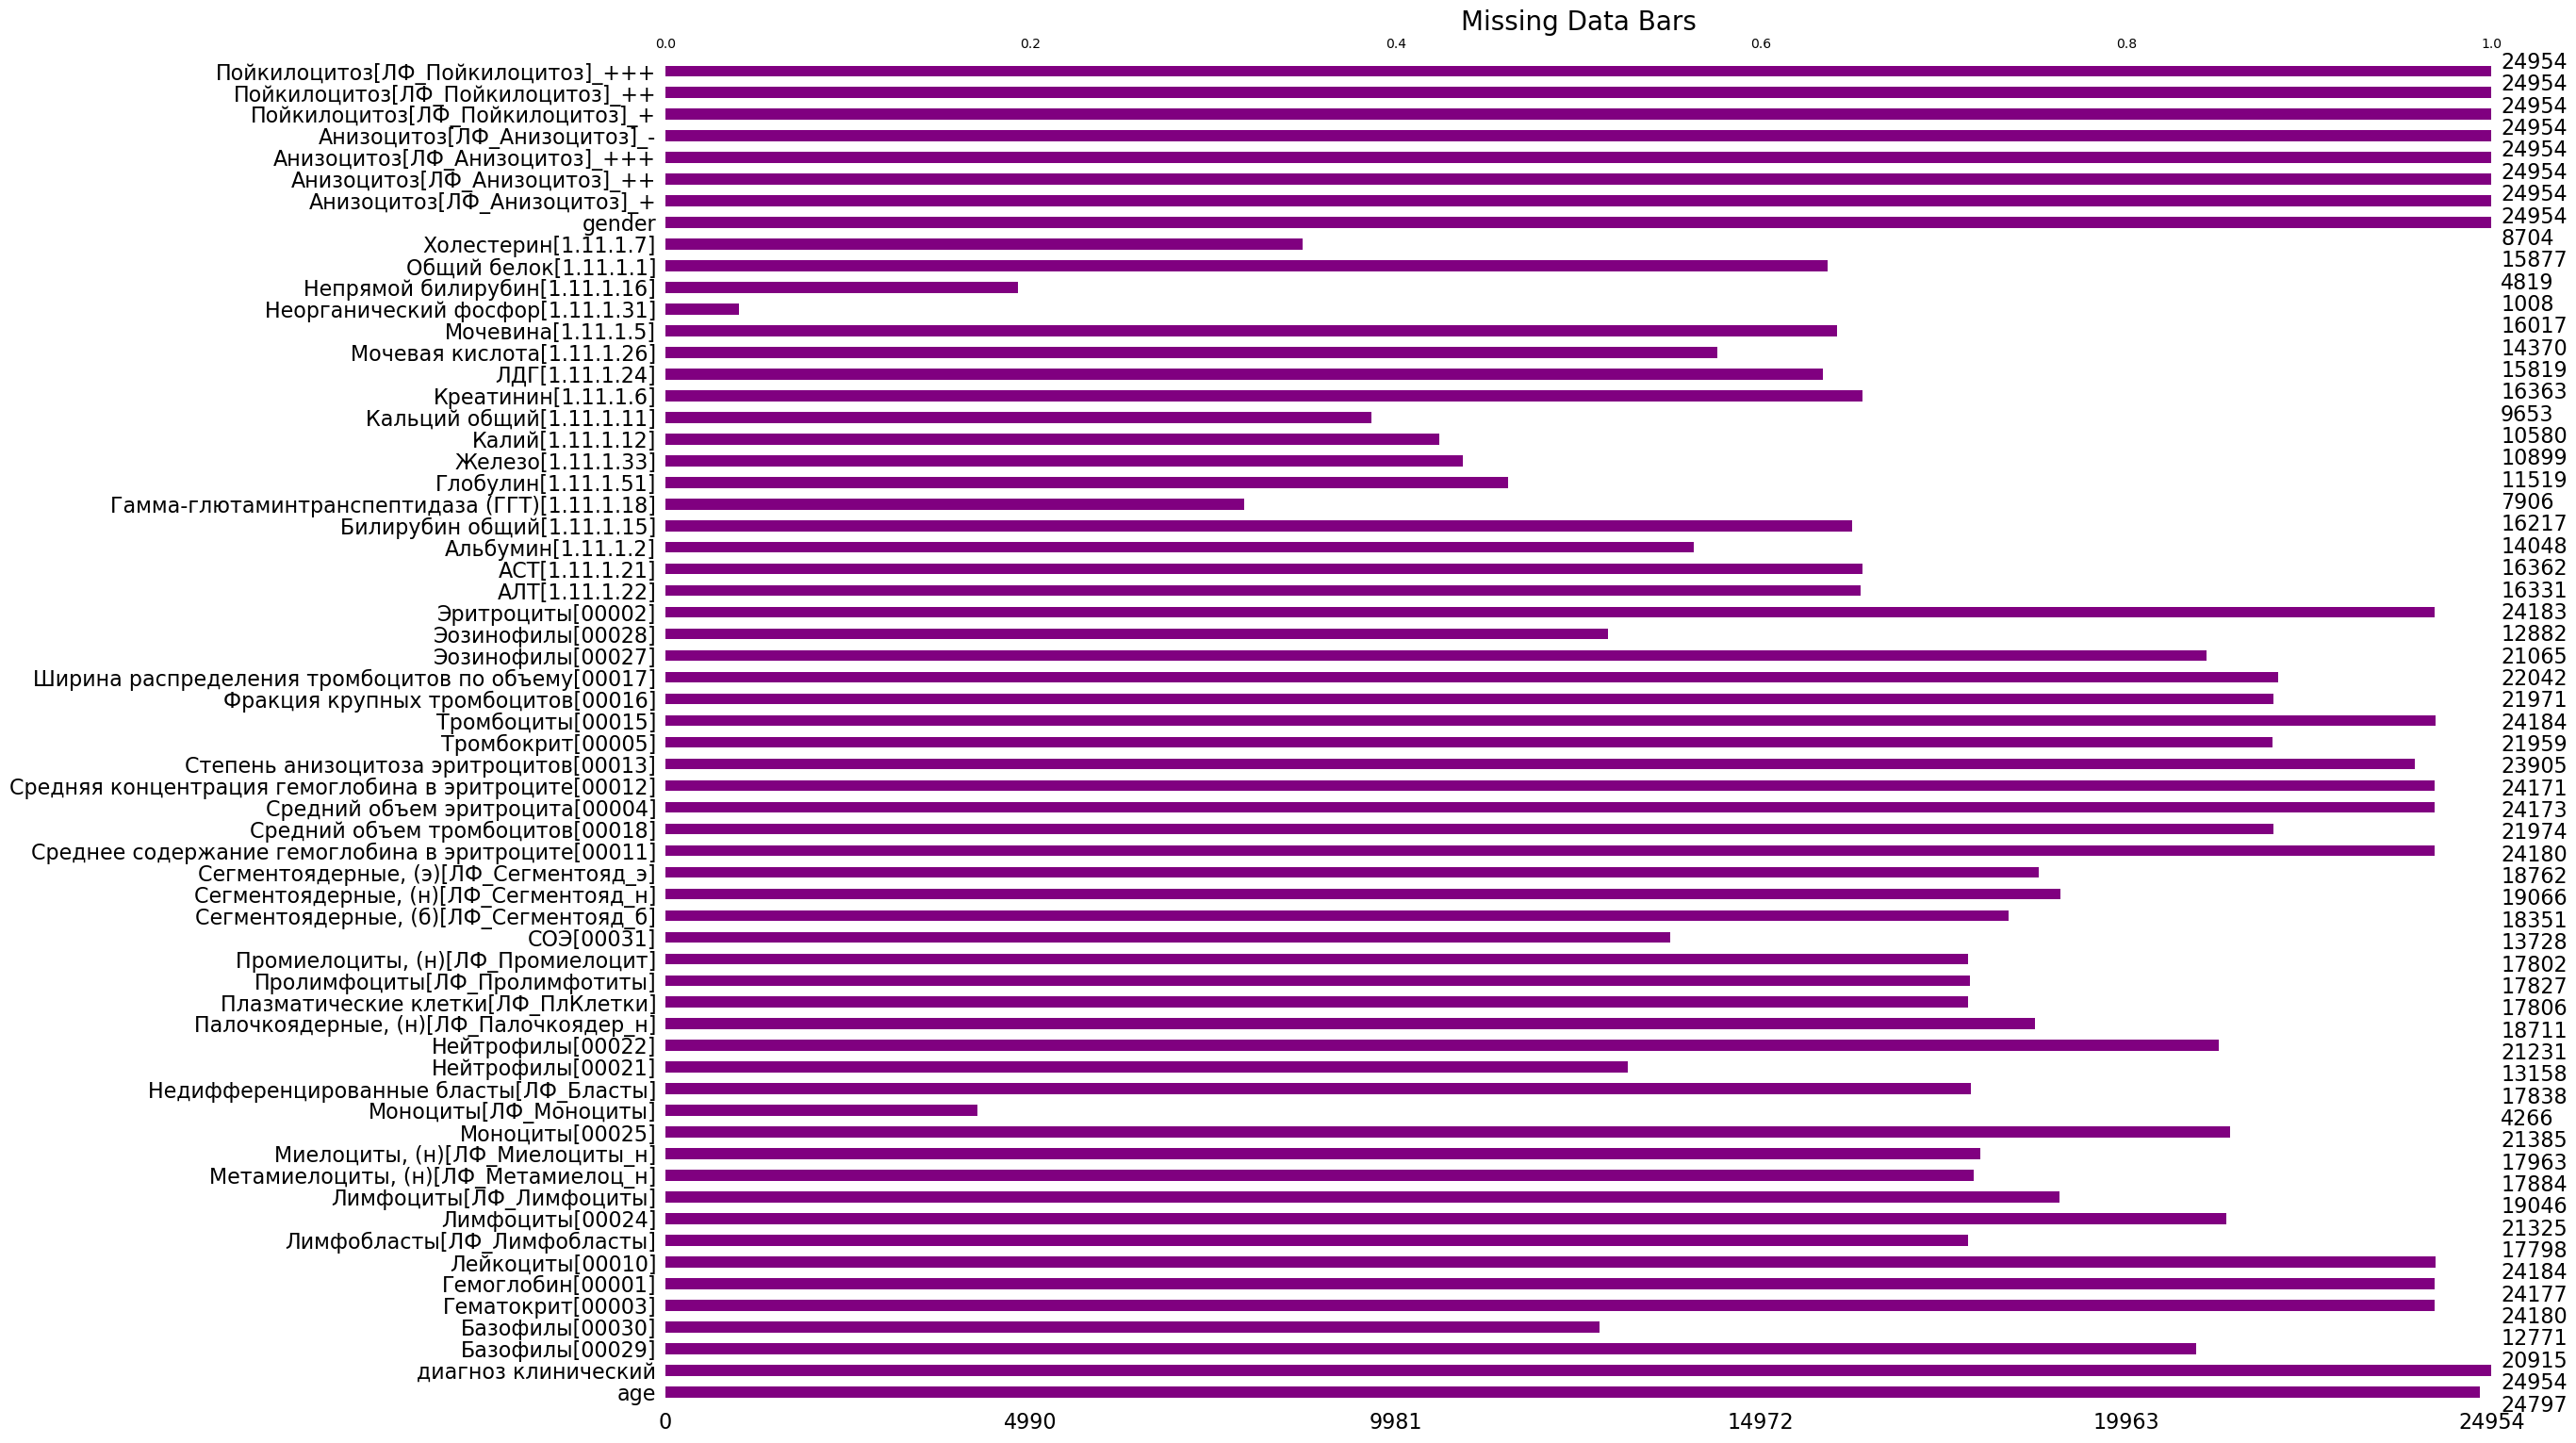

<Figure size 300x200 with 0 Axes>

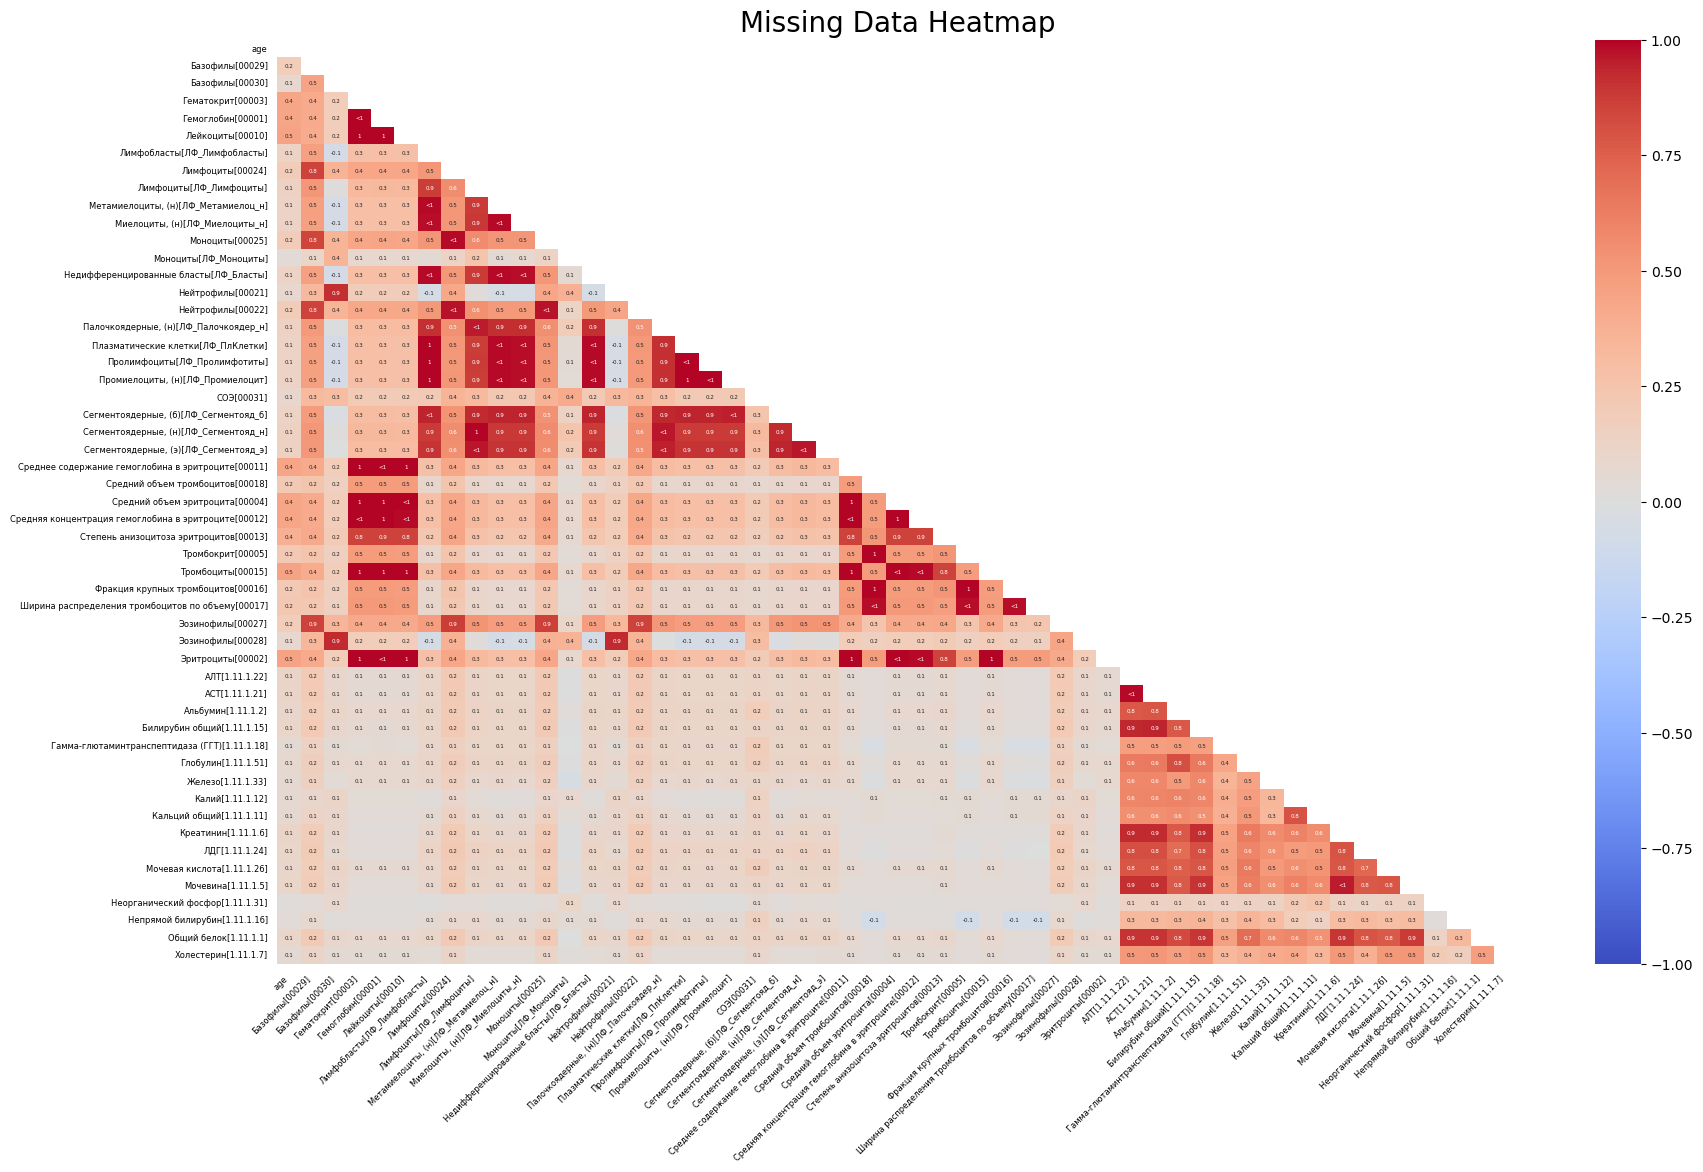

In [80]:
msno.bar(X_train, color="Purple")
plt.title("Missing Data Bars", fontsize=20)
plt.show()


plt.figure(figsize=(3, 2))
msno.heatmap(X_train, cmap="coolwarm", vmin=-1, vmax=1, fontsize=6)
plt.title("Missing Data Heatmap", fontsize=20)
plt.show()

In [81]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("According to the label mapping:")
for disease, code in label_mapping.items():
    print(f"{disease}: {code}")

According to the label mapping:
C81: 0
C82: 1
C83: 2
C85: 3
C90: 4
C91: 5
C92: 6
D45: 7
D46: 8
D47: 9
D50: 10
D59: 11
D61: 12
D69: 13
D70: 14
D72: 15
D75: 16
healthy: 17
other: 18


## 3. Distribution analysis

#### **Categorical features**:
- Frequency of values.
  - Class balance (for the target variable). - imbalanced below

We have 3 Categorical features 
 - gender
 - 'Анизоцитоз[ЛФ_Анизоцитоз]',
 - 'Пойкилоцитоз[ЛФ_Пойкилоцитоз]'


#### **Numerical features**:
  - Histograms, KDE graphs.
- **Logarithmization/scaling** if necessary.
- Dependencies on the machine learning model in the future. 



### Pairplots for blood test features

- With 30 features, the standard pairplot will be overloaded — let's select the main ones we want to look at.

/var/folders/r9/nhz980ds00gbt7dw276z18kw0000gn/T/ipykernel_42137/12333642.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plots[target_column] = y_short


Text(0.5, 1.02, 'Pairplot of Blood Test Features')

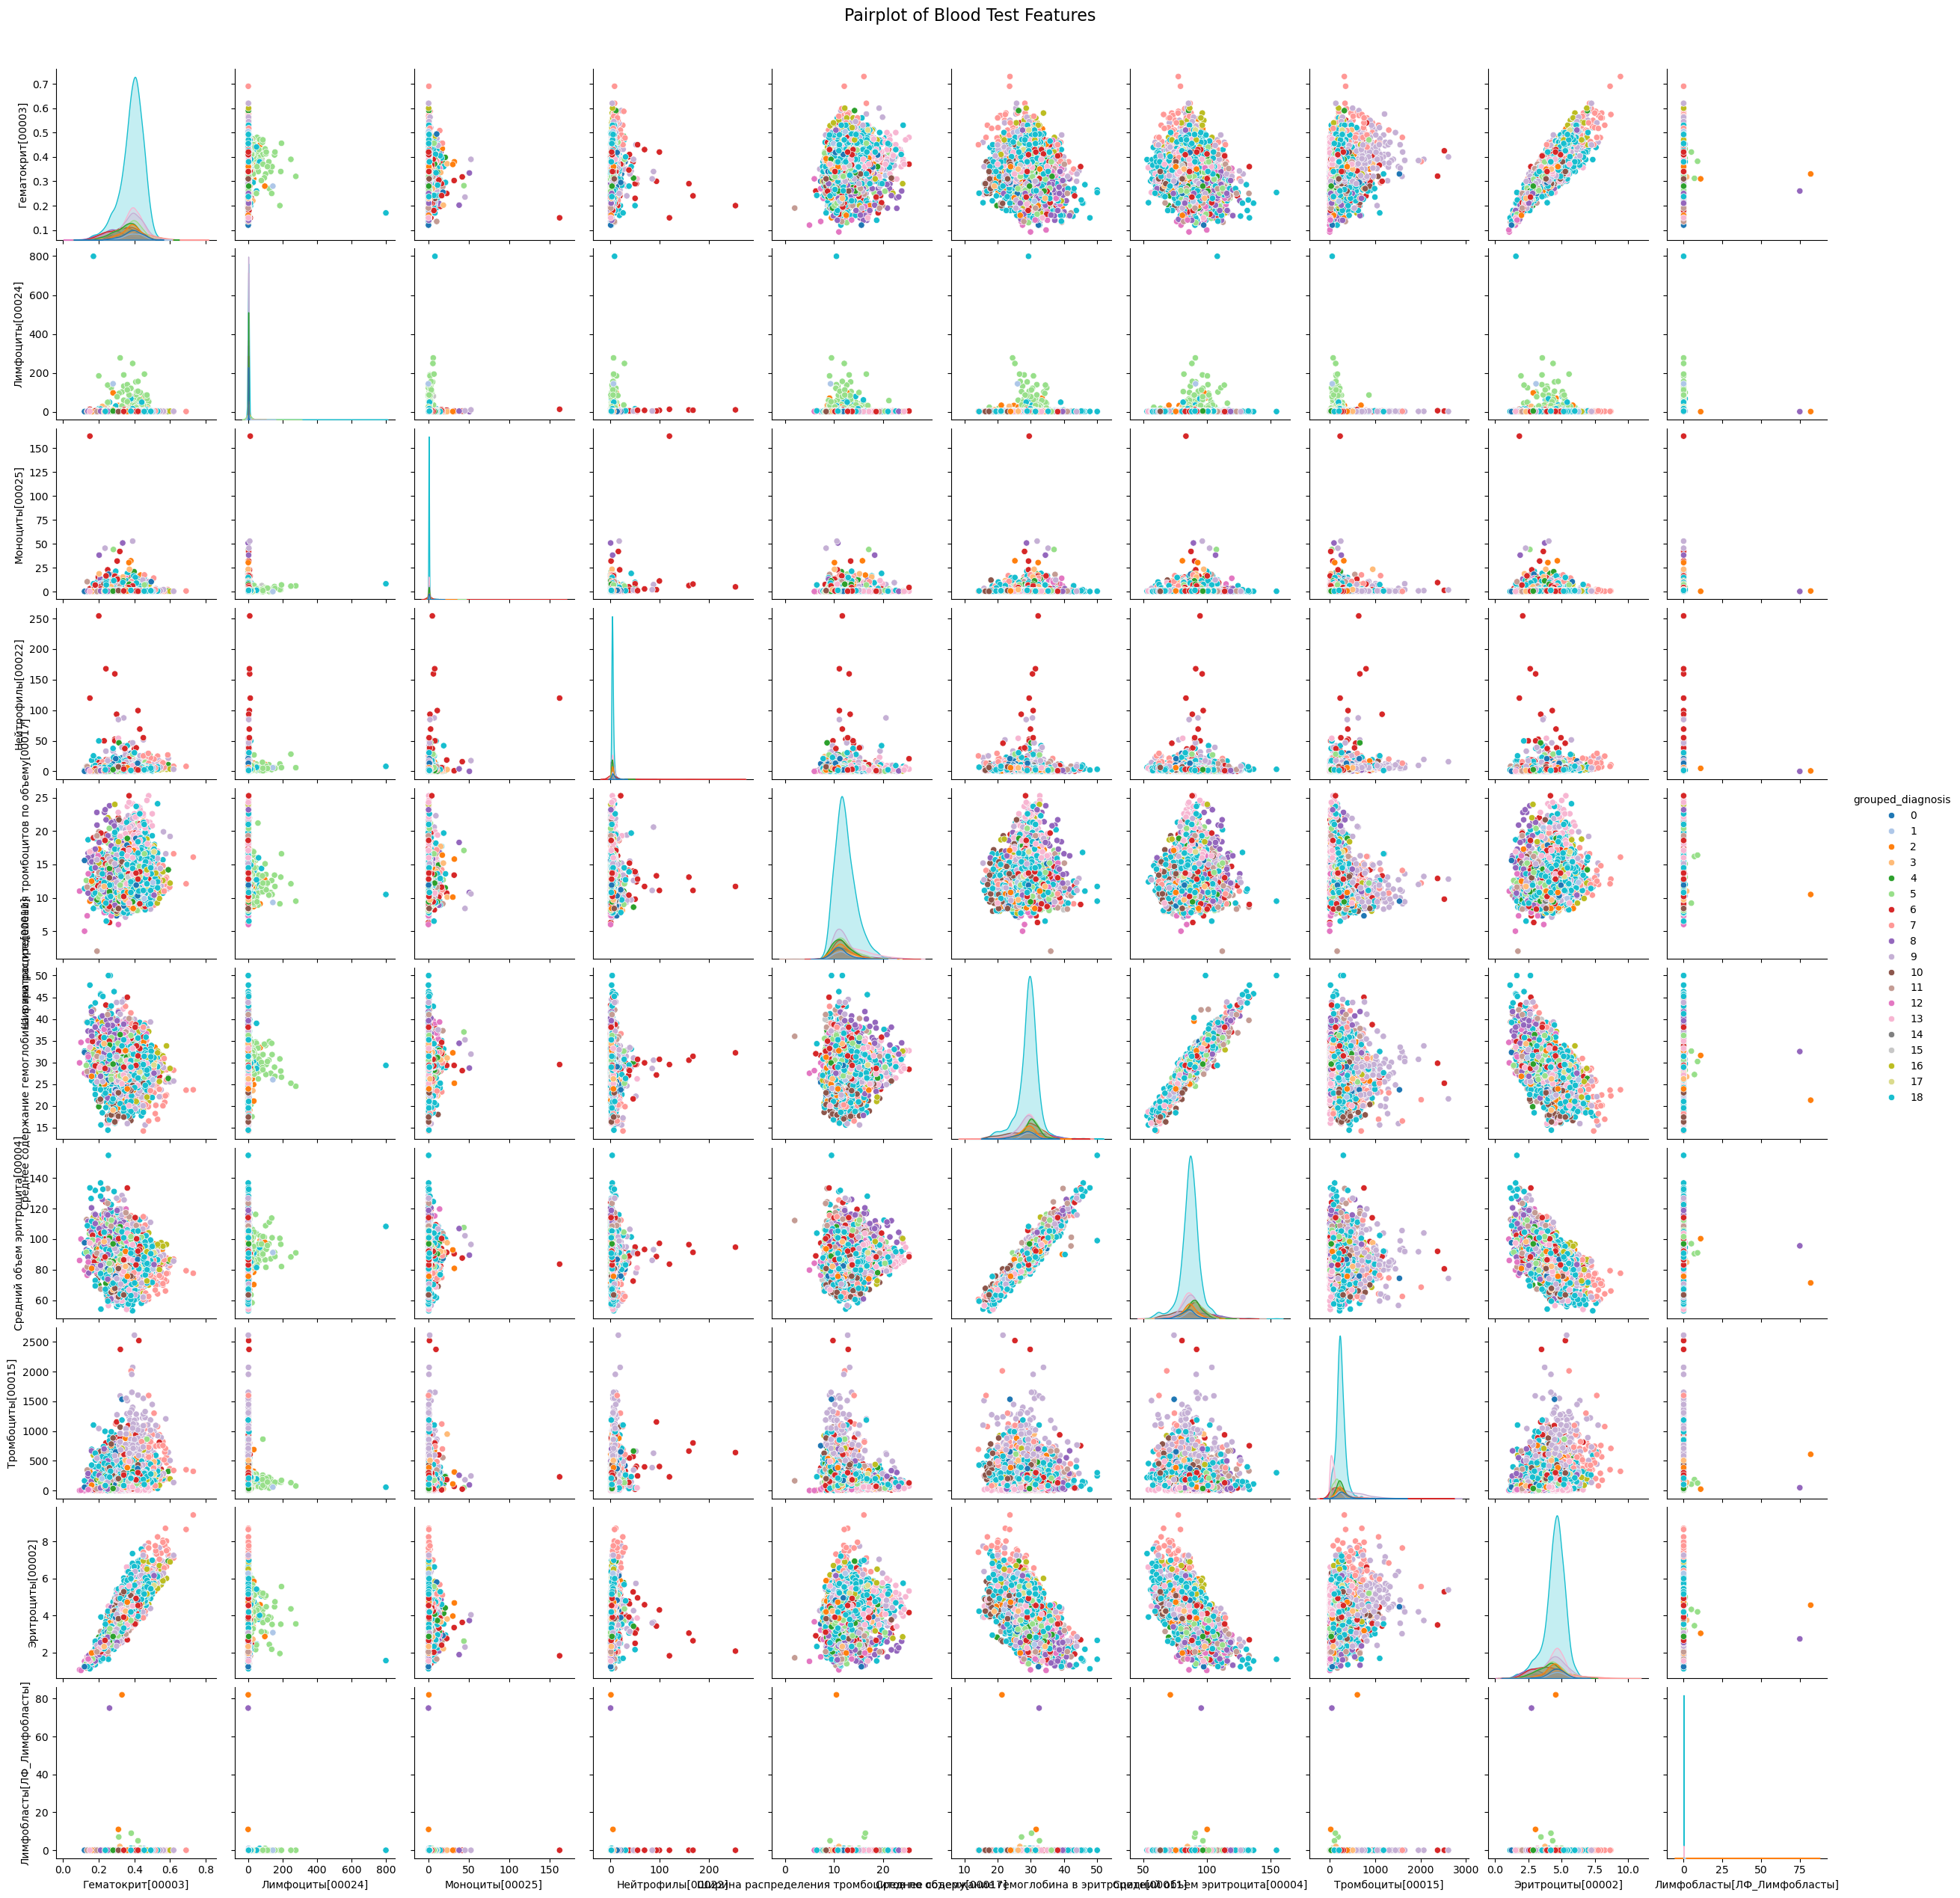

In [82]:
cols_to_plot1 = [
    "Гематокрит[00003]",
    "Лимфоциты[00024]",
    "Моноциты[00025]",
    "Нейтрофилы[00022]",
    "Ширина распределения тромбоцитов по объему[00017]",
    "Среднее содержание гемоглобина в эритроците[00011]",
    "Средний объем эритроцита[00004]",
    "Тромбоциты[00015]",
    "Эритроциты[00002]",
    "Лимфобласты[ЛФ_Лимфобласты]",
]

df_plots = X_short[cols_to_plot1]
df_plots[target_column] = y_short

sns.pairplot(
    df_plots,
    hue=target_column,
    palette="tab20",
    diag_kind="kde",
    height=2.5,
)
plt.suptitle("Pairplot of Blood Test Features", y=1.02, fontsize=16)

### Pairplots for biochemical features


/var/folders/r9/nhz980ds00gbt7dw276z18kw0000gn/T/ipykernel_42137/3412983093.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plots2[target_column] = y_short


Text(0.5, 1.02, 'Pairplot of Biochemical Test Features')

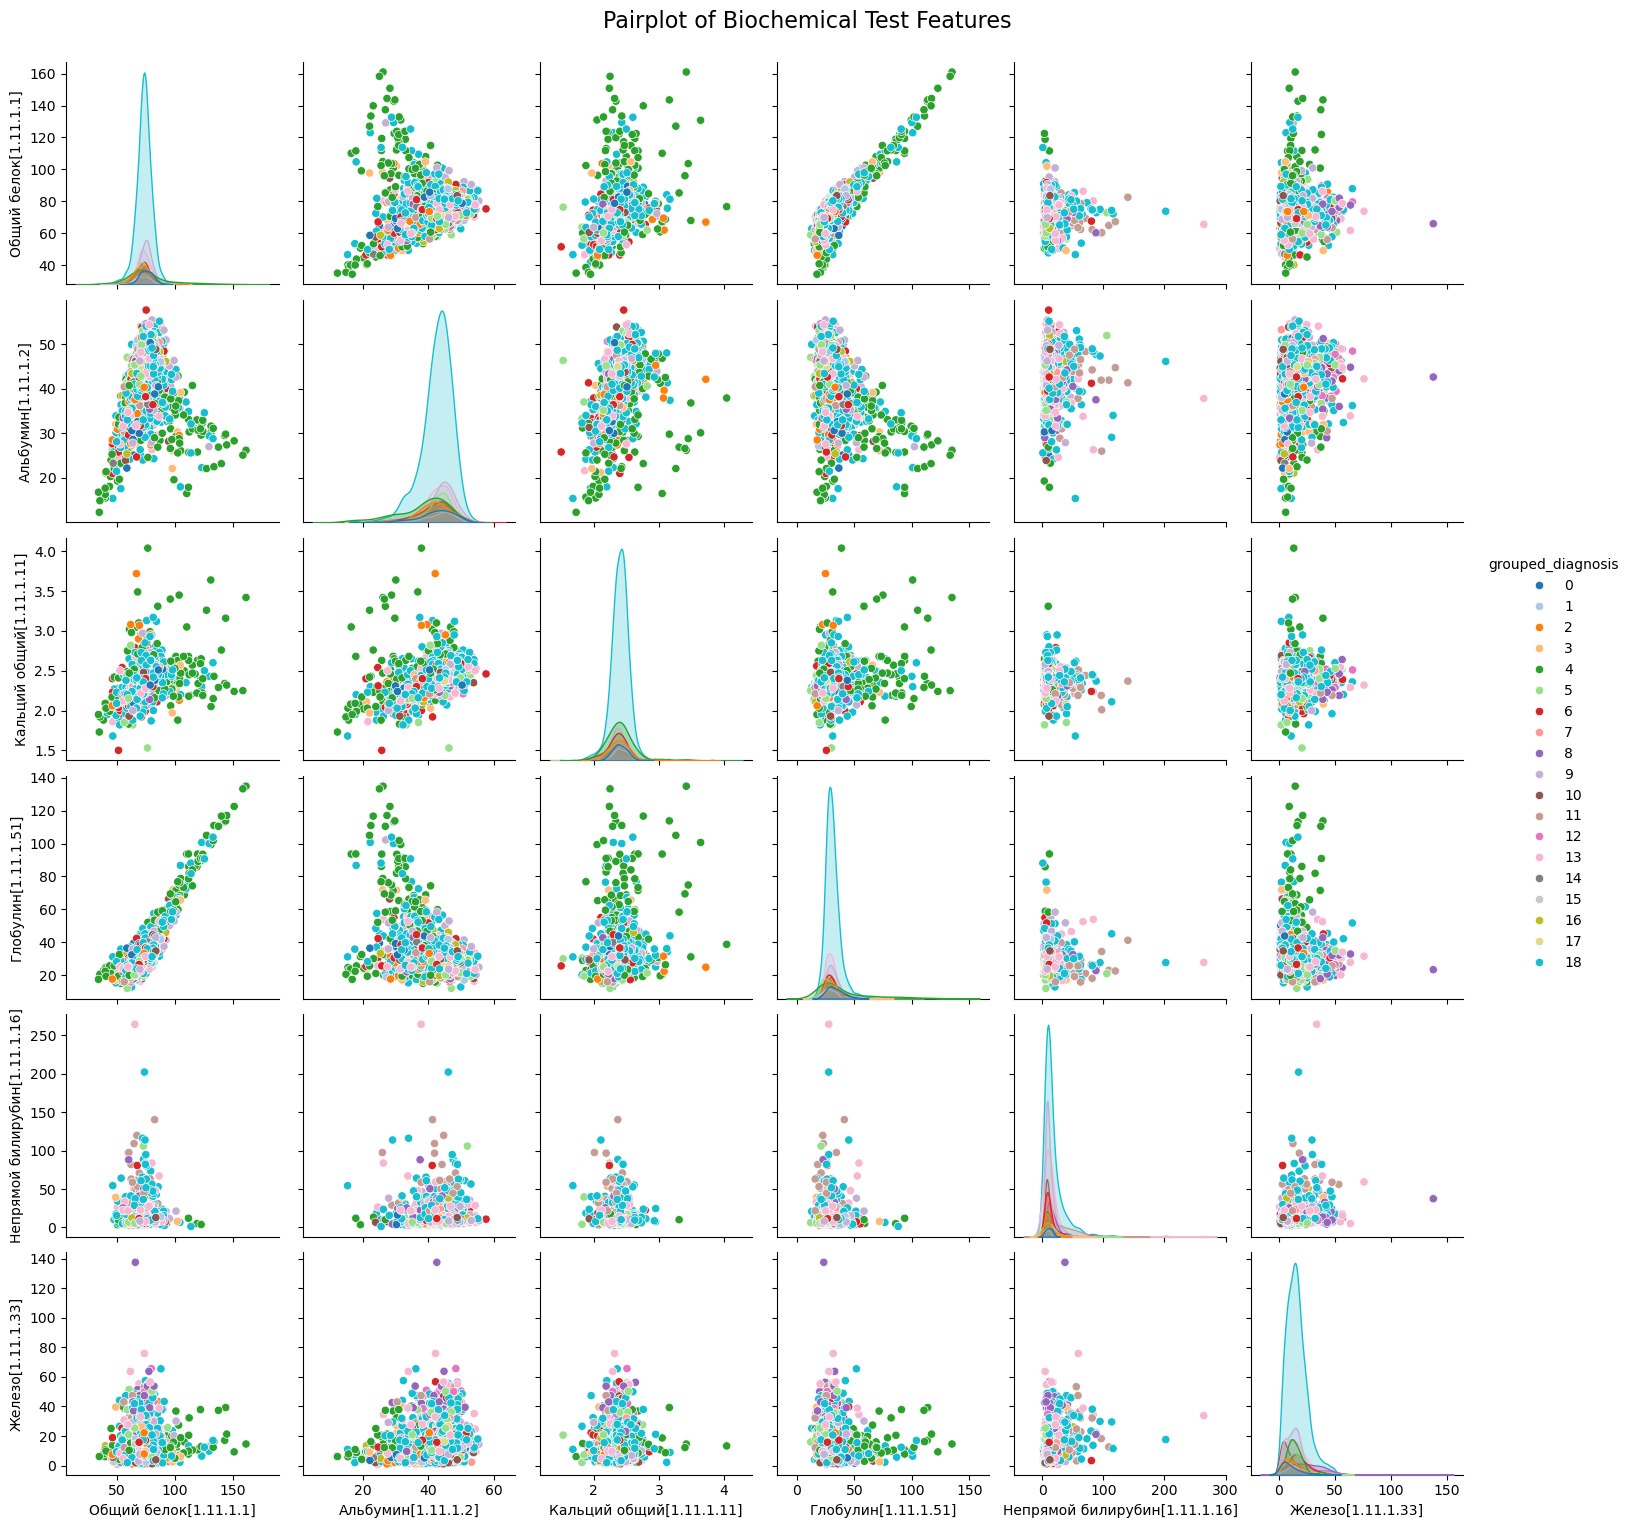

In [83]:
cols_to_plot2 = [
    "Общий белок[1.11.1.1]",
    "Альбумин[1.11.1.2]",
    "Кальций общий[1.11.1.11]",
    "Глобулин[1.11.1.51]",
    "Непрямой билирубин[1.11.1.16]",
    "Железо[1.11.1.33]",
]

df_plots2 = X_short[cols_to_plot2]
df_plots2[target_column] = y_short

sns.pairplot(
    df_plots2,
    hue=target_column,
    palette="tab20",
    diag_kind="kde",
    height=2.5,
)
plt.suptitle("Pairplot of Biochemical Test Features", y=1.02, fontsize=16)

#### Class 5 - lymphoblastic leukemia, elevated lymphocyte count

#### No other strong correlations were observed; let us construct a histogram of the distribution.

## Histogramm

/var/folders/r9/nhz980ds00gbt7dw276z18kw0000gn/T/ipykernel_42137/3964779694.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plots_histo[target_column] = y_short


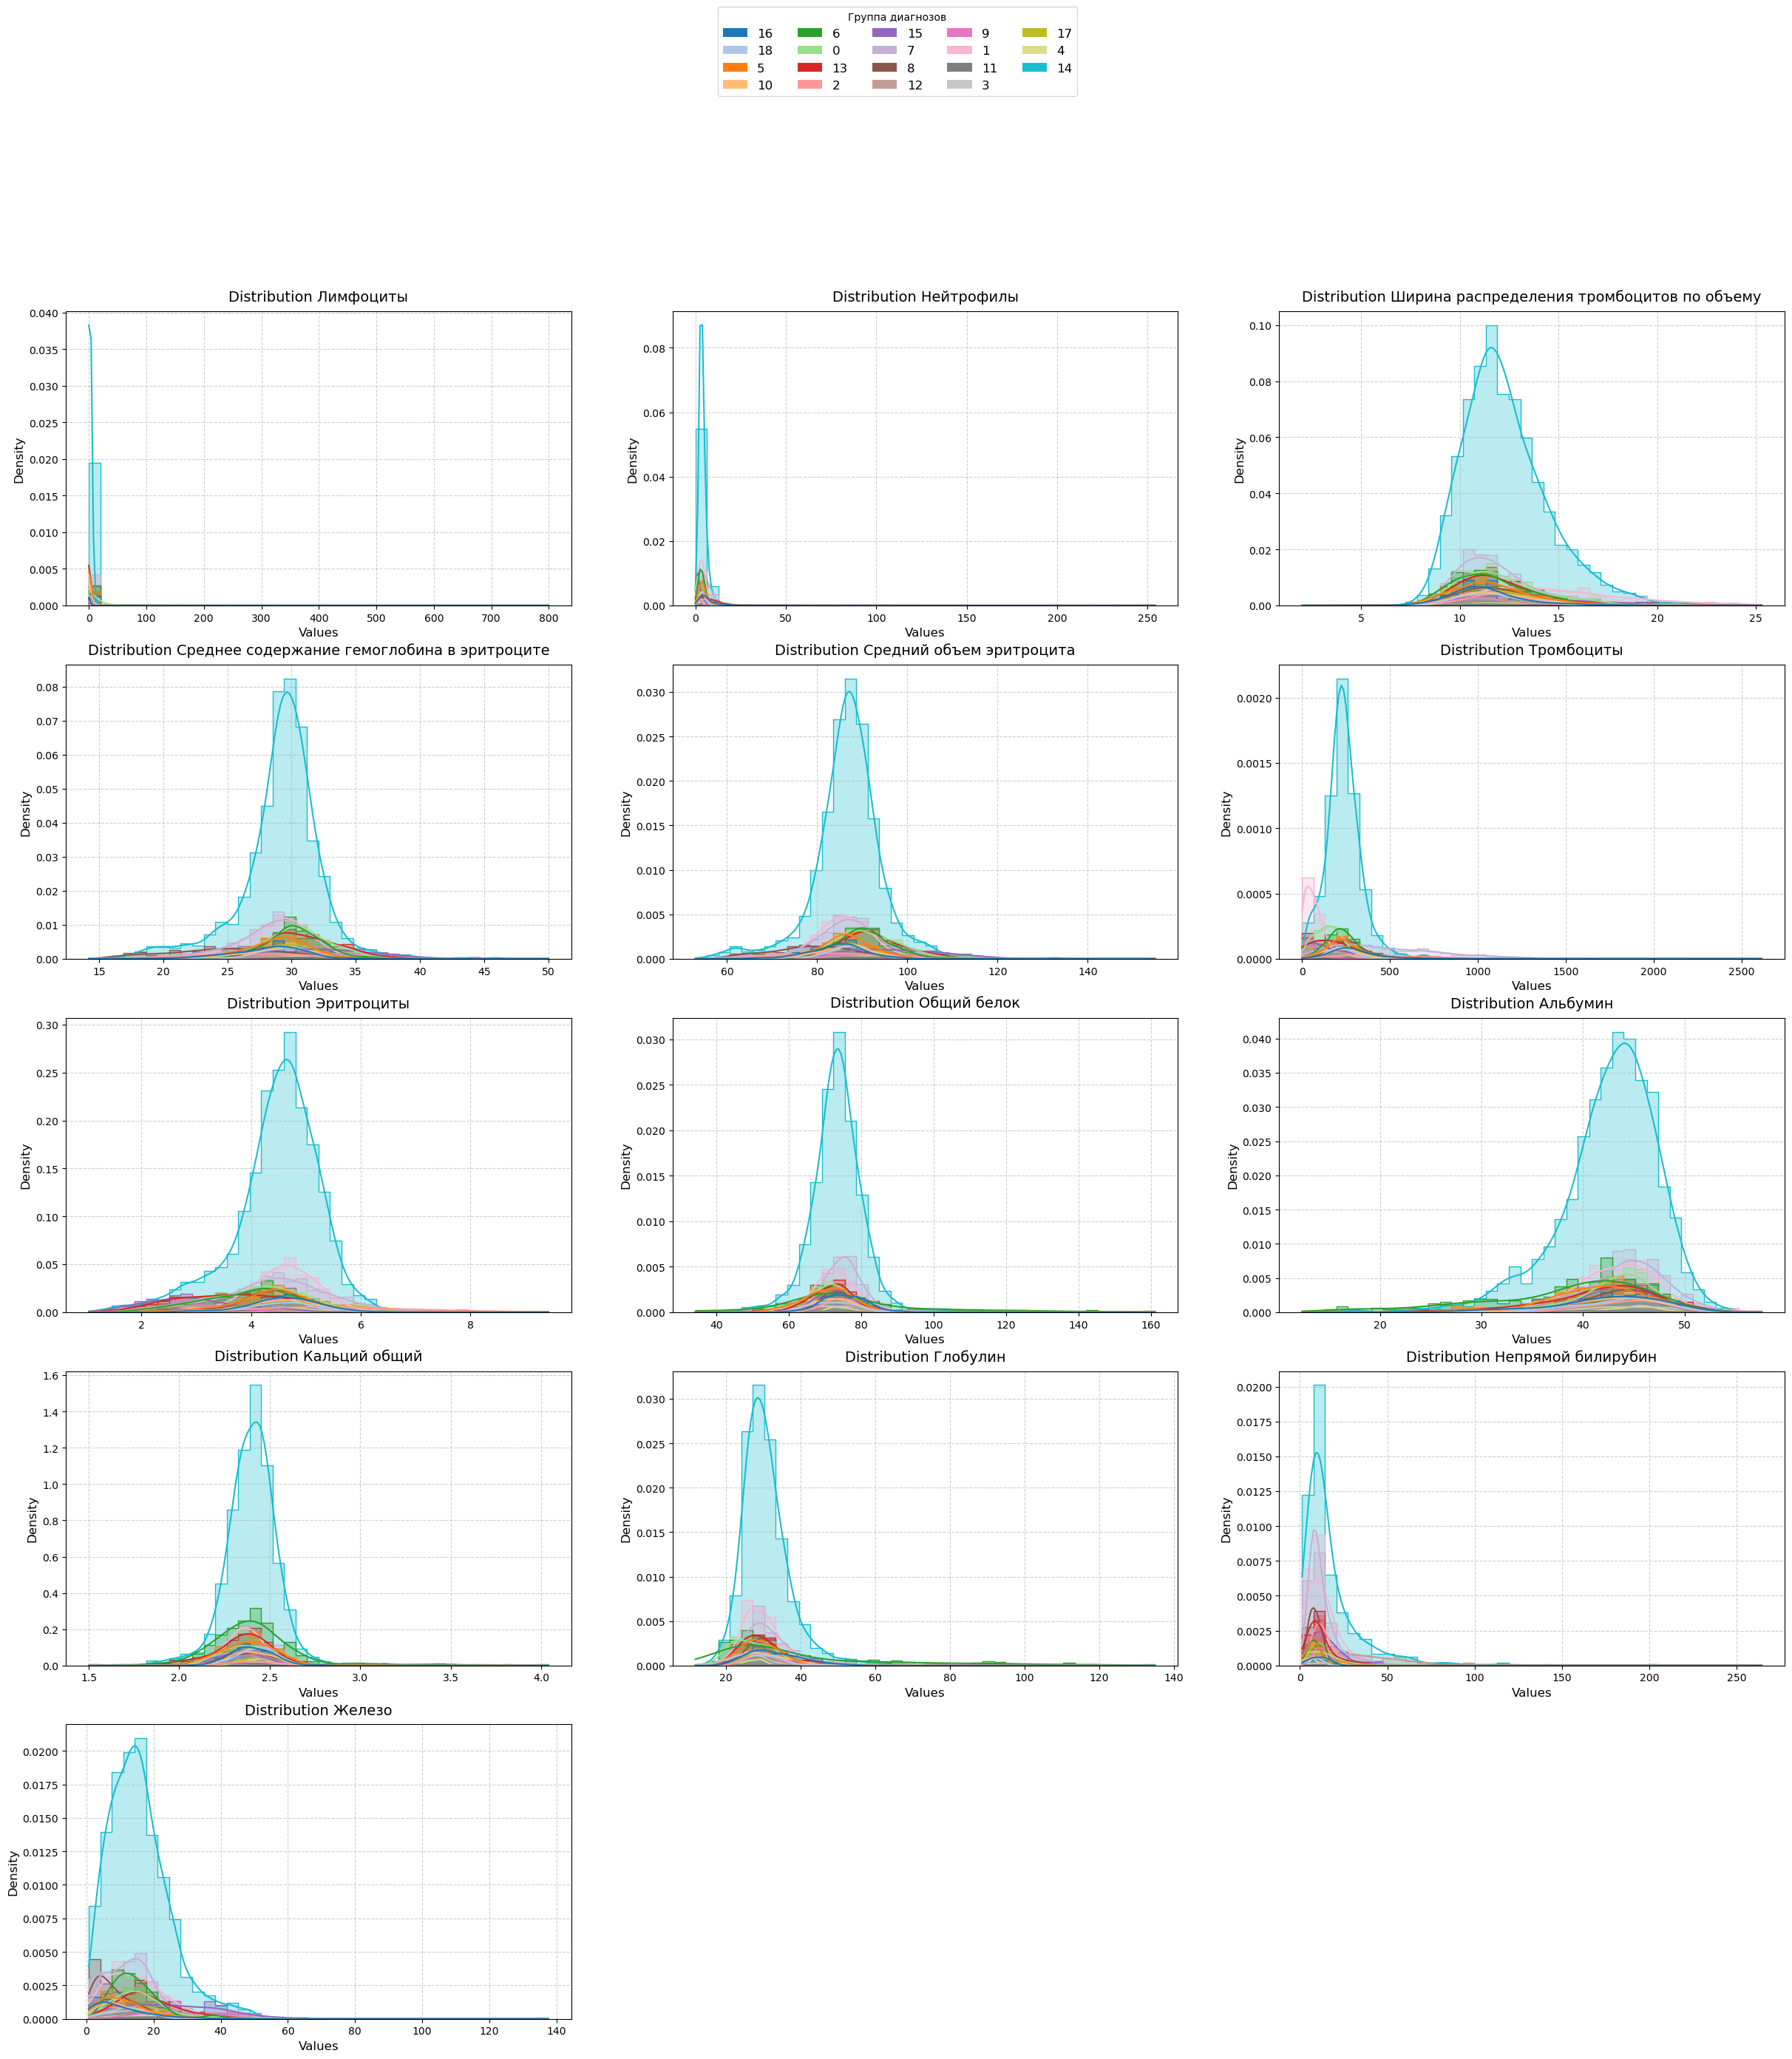

In [84]:
cols_to_plot_histo = [
    "Лимфоциты[00024]",
    "Нейтрофилы[00022]",
    "Ширина распределения тромбоцитов по объему[00017]",
    "Среднее содержание гемоглобина в эритроците[00011]",
    "Средний объем эритроцита[00004]",
    "Тромбоциты[00015]",
    "Эритроциты[00002]",
    "Общий белок[1.11.1.1]",
    "Альбумин[1.11.1.2]",
    "Кальций общий[1.11.1.11]",
    "Глобулин[1.11.1.51]",
    "Непрямой билирубин[1.11.1.16]",
    "Железо[1.11.1.33]",
]

df_plots_histo = X_short[cols_to_plot_histo]
df_plots_histo[target_column] = y_short


palette = sns.color_palette(
    "tab20", n_colors=len(df_plots_histo["grouped_diagnosis"].unique())
)

# parsameters grid
n_cols = 3
n_rows = int(np.ceil(len(df_plots_histo.columns[:-1]) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, n_rows * 6))  # size
axes = axes.flatten()

# for legend
dummy_fig, dummy_ax = plt.subplots(figsize=(1, 1))
for diagnosis in df_plots_histo["grouped_diagnosis"].unique():
    dummy_ax.bar(
        0,
        0,
        color=palette[
            list(df_plots_histo["grouped_diagnosis"].unique()).index(diagnosis)
        ],
        label=diagnosis,
    )
handles, labels = dummy_ax.get_legend_handles_labels()
plt.close(dummy_fig)

for i, column in enumerate(df_plots_histo.columns[:-1]):
    ax = axes[i]
    sns.histplot(
        data=df_plots_histo,
        x=column,
        hue="grouped_diagnosis",
        stat="density",
        ax=ax,
        bins=40,
        element="step",
        fill=True,
        alpha=0.3,
        kde=True,
        linewidth=1,
        palette=palette,
    )

    ax.set_title(f"Distribution {column.split('[')[0]}", fontsize=14, pad=10)
    ax.set_xlabel("Values", fontsize=12)
    ax.set_ylabel("Density", fontsize=12)
    ax.grid(True, linestyle="--", alpha=0.6)

    ax.get_legend().remove()

fig.legend(
    handles,
    labels,
    title="Группа диагнозов",
    loc="upper center",
    bbox_to_anchor=(0.5, 1.02),
    ncol=min(5, len(labels)),
    fontsize=12,
    frameon=True,
)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

#### - The largest distribution for class 14 is agranulocytosis. We can immediately see the imbalance in the data, which needs to be addressed.

## 4. Outlier analysis
- Visualization (histograms, scatter plots).
- Removal of anomalous values


#### - We looked at the emissions and filtered out extreme unrealistic values. 

#### - On the recommendation of a hematologist, we left the remaining emissions as they may be clinically significant.

## 5. Interrelationship analysis
- **Correlations**:
  - Correlation heatmap.
- **Pairwise dependencies**:
  - Scatter plots for numerical pairs.

### HeatMap

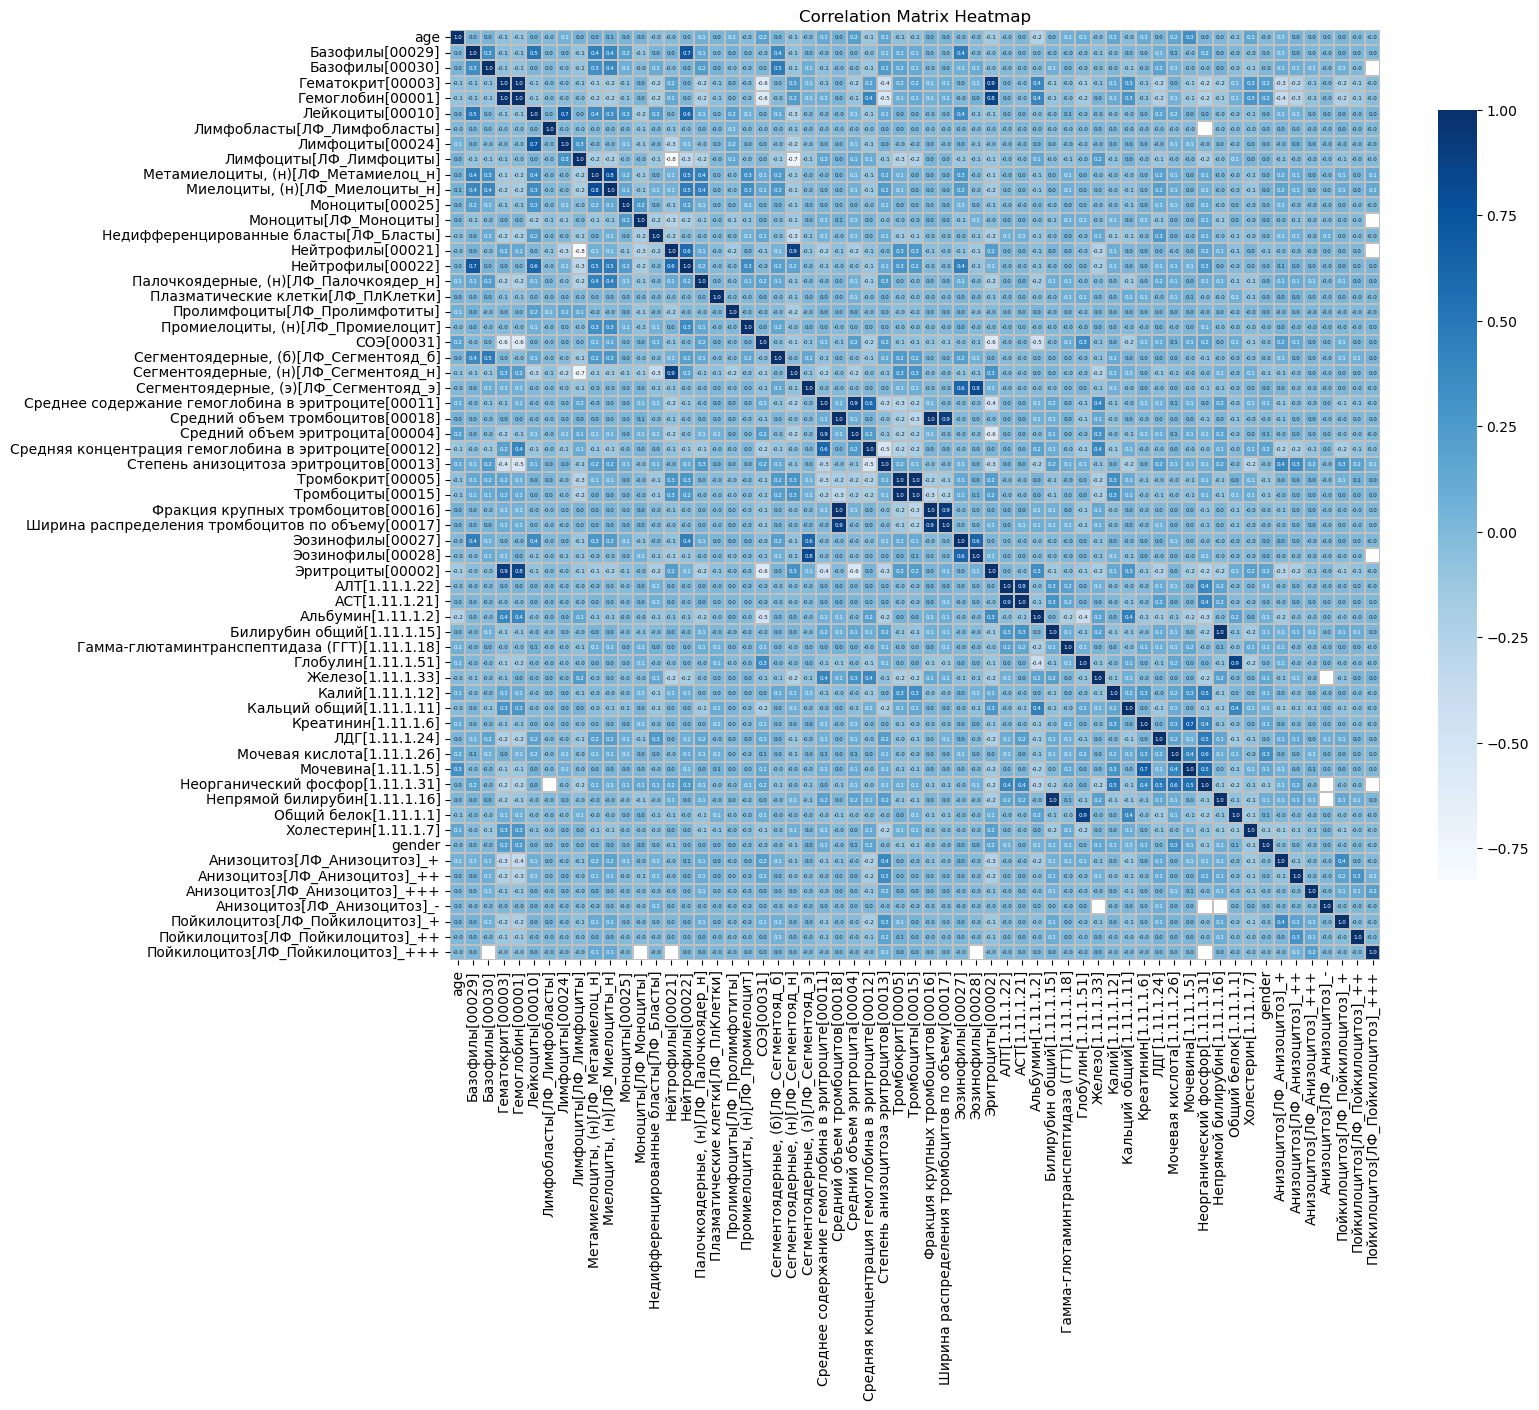

In [85]:
plt.figure(figsize=(15, 20))

X = X_short.drop(columns=["диагноз клинический"])


cmap = sns.color_palette("Blues", as_cmap=True)
corr_matrix = X.corr()


heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    cmap=cmap,
    linewidths=0.1,
    linecolor="silver",
    fmt=".1f",
    annot_kws={"size": 4},
    cbar_kws={"shrink": 0.50},
    square=True,  # Квадратные ячейки
    mask=X.corr() == 0,
)  # чтобы легенда не была большой

heatmap.set_facecolor("white")

plt.title("Correlation Matrix Heatmap")

plt.show()

### ClusterMap

- replace NaN

In [86]:
corr_matrix_without = corr_matrix.replace(np.nan, 0)

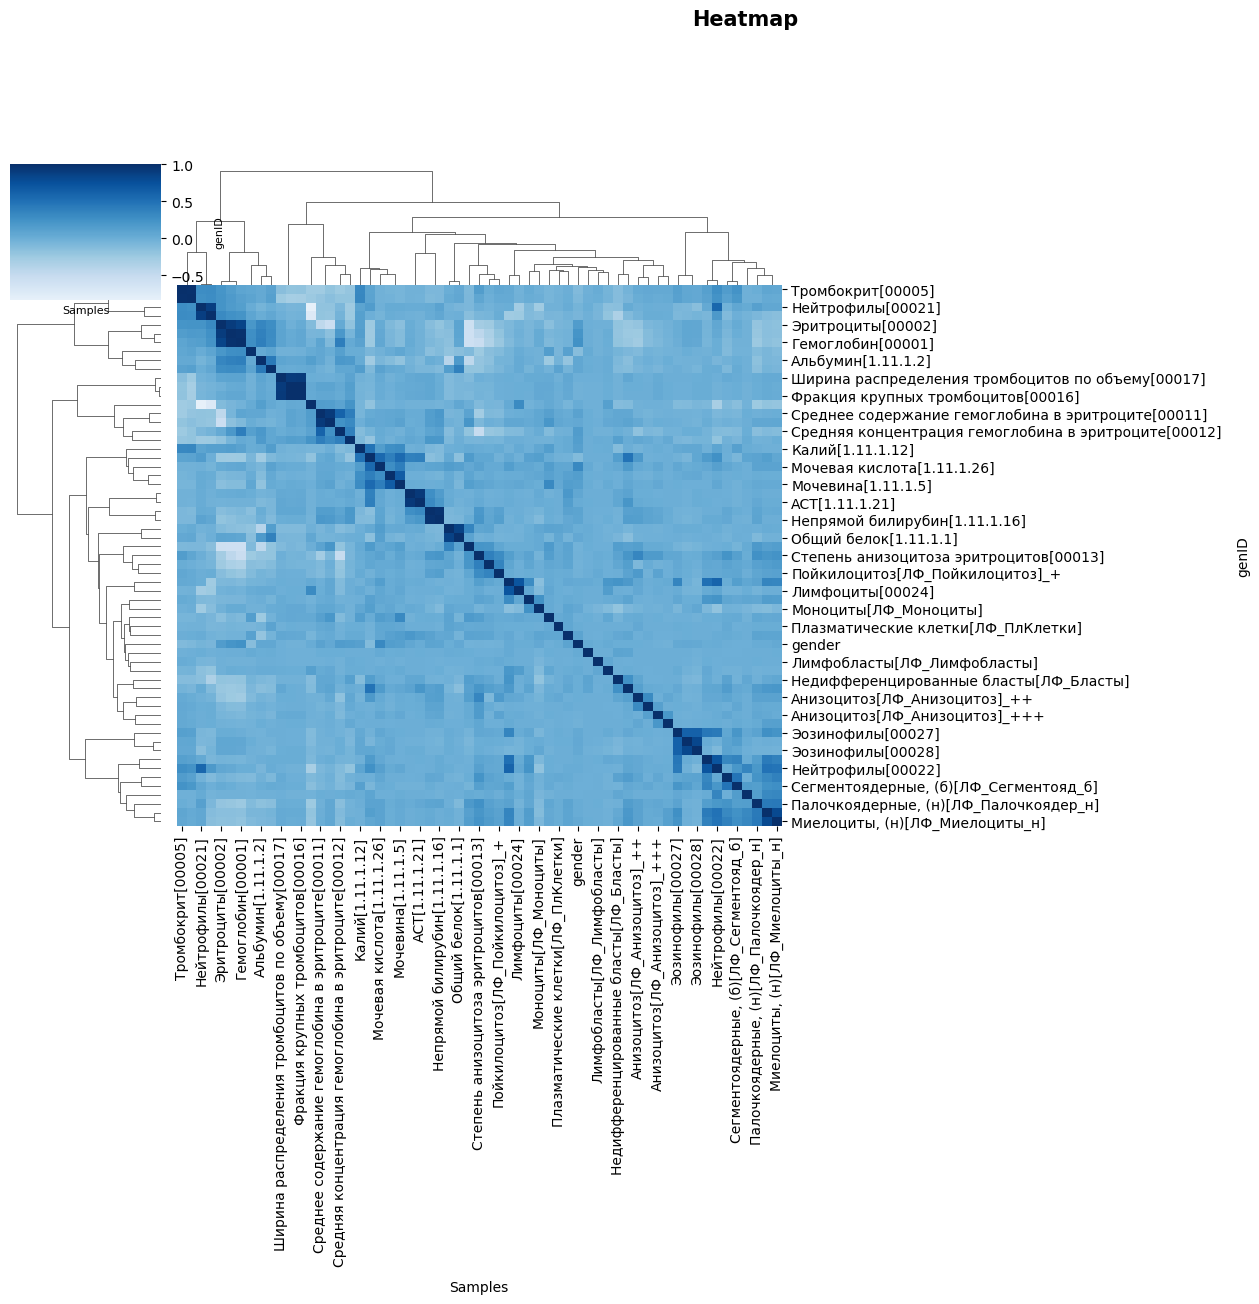

In [87]:
heat_map = sns.clustermap(
    data=corr_matrix_without,
    cmap="Blues",
    method="ward",
    center=0,
    cbar_kws={"shrink": 0.2, "pad": 0.03},
    cbar_pos=(0.05, 0.85, 0.04, 0.1),
    figsize=(15, 15),
    dendrogram_ratio=(0.2, 0.2),
)


heat_map.ax_heatmap.set_position([0.25, 0.1, 0.6, 0.6])
heat_map.ax_col_dendrogram.set_position([0.25, 0.72, 0.6, 0.2])
heat_map.ax_row_dendrogram.set_position([0.1, 0.1, 0.15, 0.6])

heat_map.ax_heatmap.set_xlabel("Samples", fontsize=10, labelpad=10)
heat_map.ax_heatmap.set_ylabel("genID", fontsize=10, labelpad=10)

plt.suptitle("Heatmap", fontsize=15, fontweight="bold", y=1.07)
plt.xlabel("Samples", fontsize=8)
plt.ylabel("genID", fontsize=8, labelpad=7)

plt.tight_layout()
plt.show()

- **We did not observe any strong correlations.**
- **There are some basic correlations that are understandable, but they may be clinically significant, and we do not filter them out.**
- **Furthermore, correlation is not important in our models**

## 6. PCA and TSNE (dimension reduction methods)

- #### Our data is quite multidimensional, so we will apply dimension reduction methods to determine whether our data can be divided into diseases or not.

In [88]:
# build according to the most represented columns
common_columns = [
    "Гематокрит[00003]",
    "Лимфоциты[00024]",
    "Моноциты[00025]",
    "Нейтрофилы[00022]",
    "Ширина распределения тромбоцитов по объему[00017]",
    "Среднее содержание гемоглобина в эритроците[00011]",
    "Средний объем эритроцита[00004]",
    "Тромбоциты[00015]",
    "Эритроциты[00002]",
]


X = X_short[common_columns]
X["target"] = y_short
X_short_pca = X.dropna()
y_target = X_short_pca["target"]
X_short_pca = X_short_pca.dropna().drop("target", axis=1)

/var/folders/r9/nhz980ds00gbt7dw276z18kw0000gn/T/ipykernel_42137/1781966608.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["target"] = y_short


/var/folders/r9/nhz980ds00gbt7dw276z18kw0000gn/T/ipykernel_42137/3665178132.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_diseases))


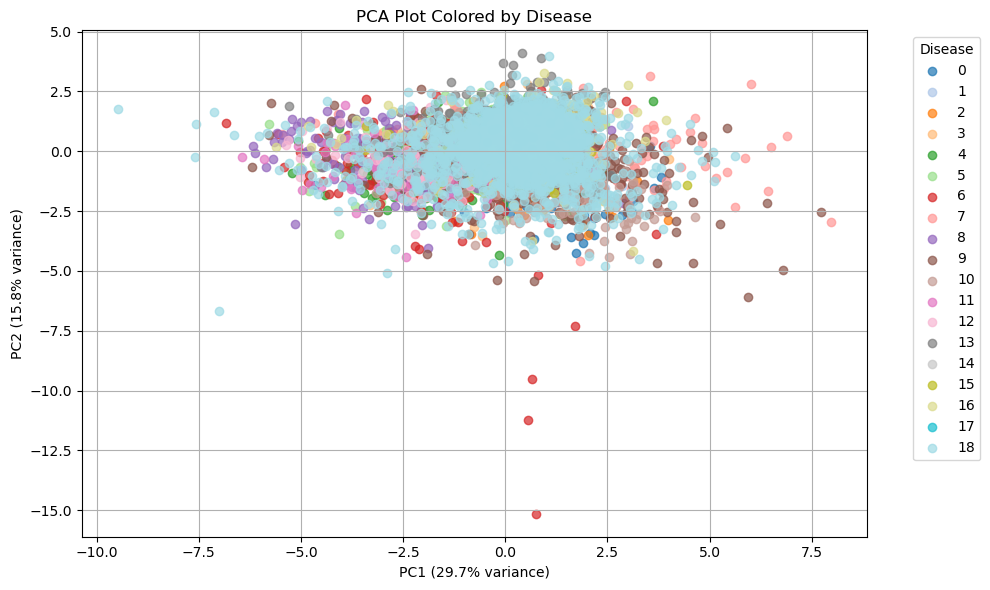

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_short_pca)  #

# 2. Apply PCA (reduce to 2D for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Create DataFrame for plotting
pca_df = pd.DataFrame({"PC1": X_pca[:, 0], "PC2": X_pca[:, 1], "disease": y_target})

# 4. Generate unique colors for each disease class
unique_diseases = np.unique(y_short)
colors = plt.cm.get_cmap("tab20", len(unique_diseases))

# 5. Create the plot
plt.figure(figsize=(10, 6))

# Plot each disease category separately
for i, disease in enumerate(unique_diseases):
    mask = pca_df["disease"] == disease
    plt.scatter(
        pca_df.loc[mask, "PC1"],
        pca_df.loc[mask, "PC2"],
        color=colors(i),
        label=disease,
        alpha=0.7,
    )

# 6. Add plot decorations
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)")
plt.title("PCA Plot Colored by Disease")
plt.legend(title="Disease", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

#### PCA + TSNE

In [90]:
def plot_tsne(data, n_iter=1000, perplexity=40, color=None):
    """
    Function for plotting t-SNE results
    :param data: table of objects x features
    :param n_iter: number of gradient descent iterations,
    it may be useful to increase this to get better results
    :param perplexity:
    :param color: np.array[n_samples] with a variable
            with which we want to color our observations
        :return tsne_emb: np.array[n_samples, 2] - t-SNE results
    """

    # approximately
    pca = PCA(n_components=5).fit(data)
    pca_embedding = pca.transform(data)

    #  t-SNE
    tnse = TSNE(
        n_components=2,
        init=pca_embedding[:, :2],
        n_jobs=-1,
        n_iter=n_iter,
        perplexity=perplexity,
        random_state=42,
        early_exaggeration=12,
        learning_rate=200,
    )
    tsne_embedding = tnse.fit_transform(pca_embedding)

    sns.scatterplot(
        x=tsne_embedding[:, 0],
        y=tsne_embedding[:, 1],
        hue=color.values.reshape(-1),
        palette=sns.color_palette("tab20", n_colors=len(np.unique(color))),
    )
    plt.xlabel("$TSNE_1$", fontsize=18)
    plt.ylabel("$TSNE_2$", fontsize=18)

    return tsne_embedding

/Users/valeria/miniconda3/envs/bioINF/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


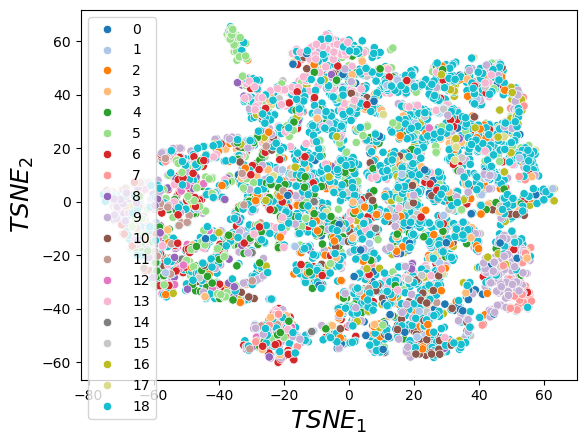

In [91]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_short_pca)

tsne_res = plot_tsne(X_scaled, color=y_target)

#### - The data is quite heterogeneous and difficult to separate, which is quite logical, because even within a family there can be different indicators for the disease
#### -  Some groups form small clusters (example, 10)

## 7. Preparation for modeling (next steps)
- **Data balance**:
  - Oversampling/Undersampling ( class imbalance).
- **Normalization/Standardization**:
  - MinMaxScaler, StandardScaler - do not use for boosting 
- **Saving processed data**:
  - Format (json, pickle).

#### **Based on the results of eda, we found that our data contains:**
- data imbalance (we balanced the data when building the model in another Jupyter notebook)
- a large number of missing values
- heterogenity of our data